In [39]:
import numpy as np
import pandas as pd
import setuptools.dist
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model


Lectura de datos

In [3]:
df = pd.read_csv('auto-mpg.data',
                 names=['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin'],
                 sep=' ',
                 na_values='?',
                 comment='\t',
                 skipinitialspace=True
                 )

In [ ]:
df

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1


Exploracion de datos en dataframe

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


In [5]:
df.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [6]:
df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


Analisis de datos

In [7]:
df.dropna(inplace=True)

In [8]:
df.shape

(392, 8)

Manejo de variables categoricas

In [9]:
df['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})
df['Origin'] = df['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})

In [10]:
df['Origin'].value_counts()

,count
Origin,
USA,245
Japan,79
Europe,68


In [11]:
pd.get_dummies(df, columns=['Origin'], prefix='', prefix_sep='')
df = pd.get_dummies(df, columns=['Origin'], prefix='', prefix_sep='', dtype=int)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           392 non-null    float64
 1   Cylinders     392 non-null    int64  
 2   Displacement  392 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        392 non-null    float64
 5   Acceleration  392 non-null    float64
 6   Model Year    392 non-null    int64  
 7   Europe        392 non-null    int64  
 8   Japan         392 non-null    int64  
 9   USA           392 non-null    int64  
dtypes: float64(5), int64(5)
memory usage: 33.7 KB


Separacion datos (entrenamiento y prueba)

In [13]:
train = df.sample(frac=0.8, random_state=100)

In [14]:
train.shape

(314, 10)

In [15]:
test = df.drop(train.index)

In [16]:
test.shape

(78, 10)

In [17]:
train_X = train.copy()
test_X = test.copy()

In [18]:
train_y = train_X.pop('MPG')
test_y = test_X.pop('MPG')

Eliminamos el valor de MPG del conjunto Y

In [19]:
train_X.head()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
125,6,198.0,95.0,3102.0,16.5,74,0,0,1
142,4,79.0,67.0,1963.0,15.5,74,1,0,0
278,4,89.0,71.0,1990.0,14.9,78,1,0,0
254,6,200.0,85.0,2965.0,15.8,78,0,0,1
328,4,146.0,67.0,3250.0,21.8,80,1,0,0


In [20]:
train_y.head()

,MPG
125,20.0
142,26.0
278,31.5
254,20.2
328,30.0


In [21]:
train_X.dtypes

,0
Cylinders,int64
Displacement,float64
Horsepower,float64
Weight,float64
Acceleration,float64
Model Year,int64
Europe,int64
Japan,int64
USA,int64


In [22]:
tf.__version__

'2.18.0'

In [24]:
tf.keras.layers.Normalization
norm = tf.keras.layers.Normalization()
norm.adapt(np.array(train_X))

In [ ]:
norm.mean.numpy()

In [25]:
norm.variance.numpy()

array([[2.8531077e+00, 1.0719739e+04, 1.4487772e+03, 7.3190656e+05,
        7.2942448e+00, 1.3441448e+01, 1.4239928e-01, 1.7145726e-01,
        2.3827539e-01]], dtype=float32)

In [26]:
np.sqrt(norm.variance.numpy())

array([[1.6891145e+00, 1.0353617e+02, 3.8062805e+01, 8.5551538e+02,
        2.7007859e+00, 3.6662581e+00, 3.7735829e-01, 4.1407397e-01,
        4.8813459e-01]], dtype=float32)

In [27]:
train_X[:1]

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
125,6,198.0,95.0,3102.0,16.5,74,0,0,1


In [28]:
norm(train_X[:1]).numpy()

array([[ 0.32240927,  0.05252171, -0.23034343,  0.166786  ,  0.36342323,
        -0.5359595 , -0.45573273, -0.5306907 ,  0.8024831 ]],
      dtype=float32)

Modelo con 4 variables


In [32]:
cuatro_variables = np.array(train_X[['Cylinders', 'Displacement', 'Horsepower', 'Weight']])
cuatro_variables_norm = tf.keras.layers.Normalization(input_shape=[4,])
cuatro_variables_norm.adapt(cuatro_variables)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Modelo

In [37]:
model_cuatro = tf.keras.Sequential([
    cuatro_variables_norm,
    tf.keras.layers.Dense(16, activation='relu'), #Capa oculta con activación relu
    tf.keras.layers.Dense(units=1)
])

In [38]:
model_cuatro.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ normalization_2 (Normalization)      │ (None, 4)                   │               9 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 16)                  │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 106 (428.00 B)

 Trainable params: 97 (388.00 B)

 Non-trainable params: 9 (40.00 B)

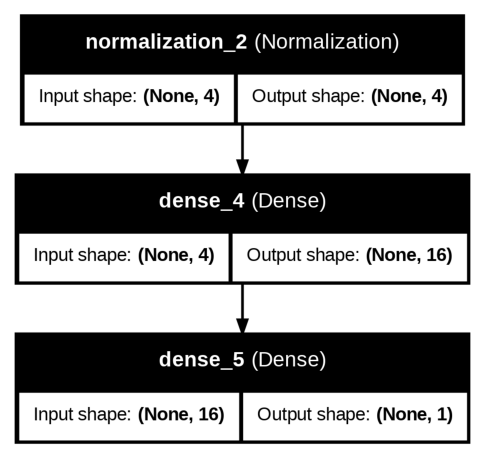

In [40]:
plot_model(model_cuatro, to_file="modelo.png", show_shapes=True, show_layer_names=True)

img = plt.imread("modelo.png")
plt.figure(figsize=(6,6))
plt.imshow(img)
plt.axis("off")
plt.show()


incluya el número de parámetros a estimar y justifique este número.

Para el calulo de parametos se sabe que se hará como:
COMPLETAR...



In [46]:
model_cuatro.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [48]:
history = model_cuatro.fit(
    cuatro_variables,
    train_y,
    epochs=100,
    validation_split = 0.2)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 21.0239 - val_loss: 14.1516
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 11.7414 - val_loss: 7.1367
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 6.5025 - val_loss: 4.5187
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 4.5971 - val_loss: 4.3315
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 3.9713 - val_loss: 3.4567
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 3.7642 - val_loss: 3.7048
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 3.4280 - val_loss: 3.2475
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 3.3003 - val_loss: 3.0653
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 2.9758 - val_loss: 3.0819
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 3.4137 - val_loss: 3.1687
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 3.0329 - val_loss: 2.7308
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 2.8475 - val

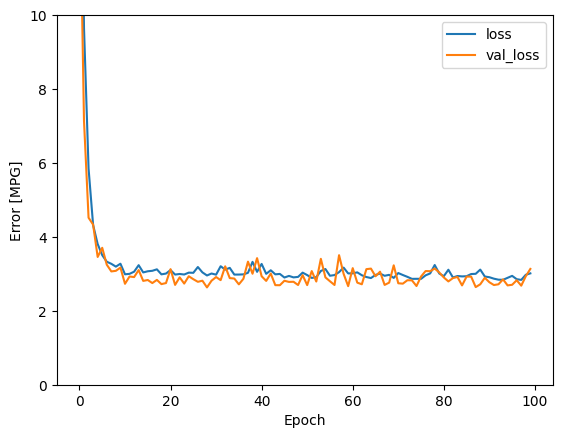

In [49]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.ylim([0, 10])
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.legend()

Funciónpara modificar las neuronas

In [50]:
def modificaciones(neuronas):
  model_cuatro = tf.keras.Sequential([
    cuatro_variables_norm,
    tf.keras.layers.Dense(neuronas, activation='relu'), #Capa oculta con activación relu
    tf.keras.layers.Dense(units=1)
  ])
  plot_model(model_cuatro, to_file="modelo.png", show_shapes=True, show_layer_names=True)
  #Graficar
  img = plt.imread("modelo.png")
  plt.figure(figsize=(6,6))
  plt.imshow(img)
  plt.axis("off")
  plt.show()
  # compliar
  model_cuatro.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')
  #historial de perdida
  history = model_cuatro.fit(
    cuatro_variables,
    train_y,
    epochs=100,
    validation_split = 0.2)

  # Graficar
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()


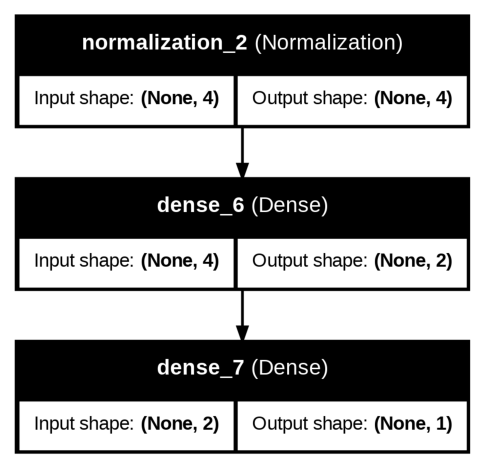

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 21.5661 - val_loss: 14.6688
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 15.2101 - val_loss: 8.3302
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 7.4333 - val_loss: 6.7000
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 6.4872 - val_loss: 4.7516
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 4.4725 - val_loss: 3.8592
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 3.7252 - val_loss: 3.7228
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 3.3307 - val_loss: 3.2235
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 3.1722 - val_loss: 3.2090
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 2.9656 - val_loss: 3.0820
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 3.0351 - val_loss: 2.9313
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2.8228 - val_loss: 3.0470
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 2.9311 - val

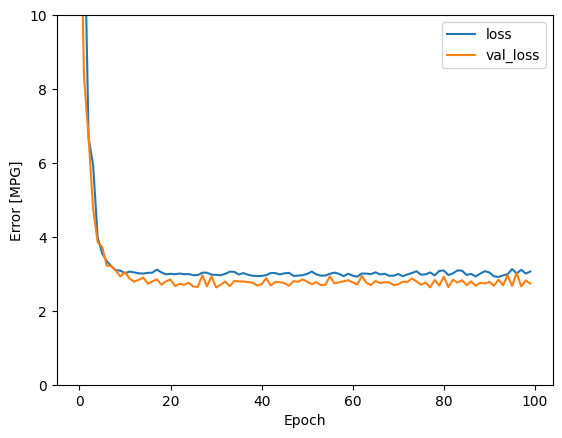

In [51]:
modificaciones(2)

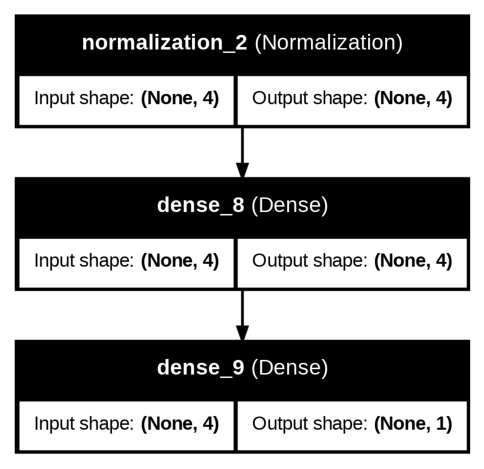

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 22.7018 - val_loss: 16.7370
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 17.2154 - val_loss: 11.8385
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 10.9673 - val_loss: 5.0779
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 5.9687 - val_loss: 6.1096
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 5.3305 - val_loss: 3.3216
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3.6883 - val_loss: 3.1330
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 3.0840 - val_loss: 2.9229
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 3.0925 - val_loss: 2.9587
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3.1068 - val_loss: 2.9469
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 3.1282 - val_loss: 2.9143
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.8093 - val_loss: 3.2515
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 3.1960 - v

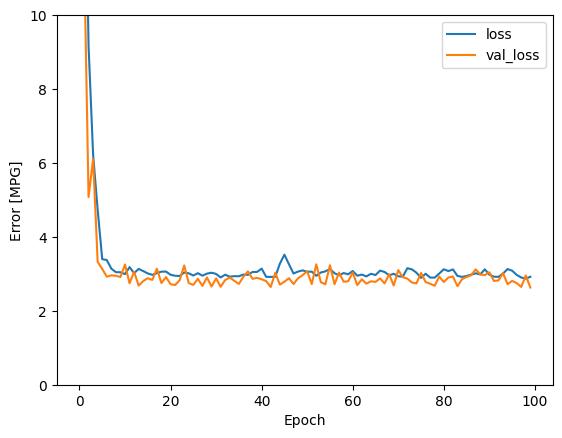

In [52]:
modificaciones(4)

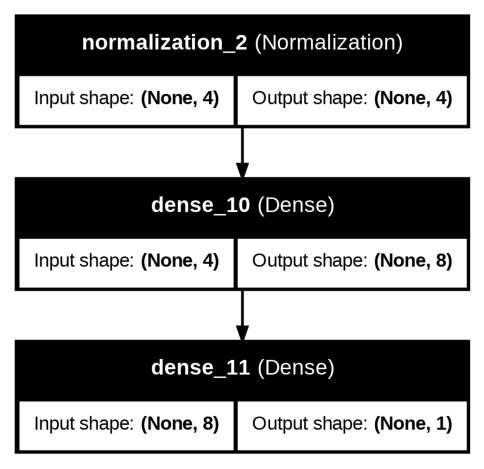

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 22.8747 - val_loss: 18.6422
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 19.6740 - val_loss: 15.9370
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 16.4961 - val_loss: 5.5508
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 5.3523 - val_loss: 6.2725
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 4.5286 - val_loss: 3.7490
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 3.9481 - val_loss: 3.7233
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 3.4514 - val_loss: 3.0187
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 2.8745 - val_loss: 2.9706
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 3.0232 - val_loss: 3.1295
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 2.9417 - val_loss: 2.8371
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3.1186 - val_loss: 3.0974
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2.8477 - v

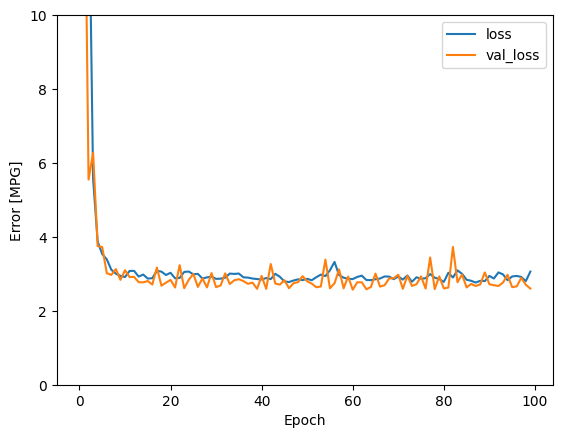

In [53]:
modificaciones(8)